# EDA
### Assessing the value of draws in the data

## 1. Functions
## 2. Build Dataframe
* 2.1 Wins
* 2.2 Losses
* 2.3 Draws

In [1]:
import pandas as pd
import numpy as np

# sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report 

# plotting
import seaborn as sns

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set() 

import warnings
warnings.filterwarnings("ignore")

In [2]:
soccer= pd.read_csv('soccer.csv')

## 1. Functions

### team_df 
Allows a user to enter in a team name from the list shown above, plus a match week, and the half in the game. It then pulls the appropriate data from the soccer dataframe and generates a new one for the specified team, during the specified week and half.

### counts
Counts the number of times that a unique event happens during the given game.

### column_name
Creates a column name in the dataframe for each event.

### get_unique
Used to return a list of unique values in a given series.

### team_win
Populates an individual game record with the team name, winner, and gameweek.

### populate
Adds the counts for each unique event within a game record.

In [3]:
def team_df(name, week):
    team = soccer[soccer.teamId == name]
    
    # now a dataframe containing just one game
    oneGame = team[team.gameweek == week]
       
    return oneGame

In [4]:
def counts(pos,event):
    (temp['subEventName'] == event)
    return l

In [5]:
def column_name(name2):
    i = name2
    return i

In [6]:
def get_unique(field):
    values = field.unique()
    return values

In [7]:
def team_win(team, win, week):
    game_temp['team'] = get_unique(team)
    game_temp['win'] = get_unique(win) 
    game_temp['gameWeek'] = get_unique(week)

In [8]:
def populate(action):
    for a in action:
        field = column_name(a)
        game_temp[field] = len(temp[(temp['subEventName'] == a)])   

## 2. Build Dataframe

In [9]:
events = get_unique(soccer.subEventName)

In [10]:
columns = ['team','gameWeek','win']

for e in events:
    columns.append(e)

In [11]:
games = pd.DataFrame(columns = columns)

In [12]:
teams = get_unique(soccer.teamId)
gameweek = get_unique(soccer.gameweek)

In [13]:
for t in teams:
    for w in gameweek:
        # build each game's dataframe
        temp = team_df(t,w)
        
        #temp dataframe to hold our record in
        game_temp = pd.DataFrame(columns = columns)
        
        # populate the record with the team name, winner, and gameweek
        team_win(temp.teamId,temp.winner,temp.gameweek)
        
        # populate the remaining fields using our populate function
        populate(events)
        
        # append the record to the final dataframe
        games = pd.concat([games, game_temp], ignore_index=True)

In [14]:
games.head()

,team,gameWeek,win,Simple pass,Touch,Ground loose ball duel,Foul,Ground attacking duel,Ground defending duel,Offside,...,Penalty,Simulation,Goal kick,Save attempt,Goalkeeper leaving line,Hand pass,Reflexes,Violent Foul,Ball out of the field,Whistle
0,Real Sociedad,38.0,Barcelona,281,59,21,12,57,98,3,...,0,0,12,2,1,4,2,0,0,0
1,Real Sociedad,37.0,Real Sociedad,457,72,29,8,64,73,3,...,1,0,10,0,2,5,3,0,0,0
2,Real Sociedad,36.0,Sevilla,403,92,34,10,74,49,2,...,0,0,6,3,0,3,4,0,0,0
3,Real Sociedad,34.0,Málaga,527,81,26,0,93,56,2,...,0,0,5,1,0,4,3,0,0,0
4,Real Sociedad,33.0,Real Sociedad,412,75,31,12,84,62,0,...,0,0,4,0,1,1,2,0,0,0


### Populate the wins field and change them to a 0, 1, or 2.

In [15]:
games.loc[(games['win'] == games['team']), 'win'] = 2
games.loc[(games['win'] == '0'), 'win'] = 1
games.loc[(games['win'] != 1) & (games['win'] != 2), 'win'] = 0

In [16]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   team                     3652 non-null   object 
 1   gameWeek                 3652 non-null   float64
 2   win                      3652 non-null   object 
 3   Simple pass              3652 non-null   object 
 4   Touch                    3652 non-null   object 
 5   Ground loose ball duel   3652 non-null   object 
 6   Foul                     3652 non-null   object 
 7   Ground attacking duel    3652 non-null   object 
 8   Ground defending duel    3652 non-null   object 
 9   Offside                  3652 non-null   object 
 10  Air duel                 3652 non-null   object 
 11  Smart pass               3652 non-null   object 
 12  Shot                     3652 non-null   object 
 13  Acceleration             3652 non-null   object 
 14  Out of game foul        

### 2.1 Wins

In [17]:
wins = games.loc[games['win'] == 2]

In [18]:
wins.head()

,team,gameWeek,win,Simple pass,Touch,Ground loose ball duel,Foul,Ground attacking duel,Ground defending duel,Offside,...,Penalty,Simulation,Goal kick,Save attempt,Goalkeeper leaving line,Hand pass,Reflexes,Violent Foul,Ball out of the field,Whistle
1,Real Sociedad,37.0,2,457,72,29,8,64,73,3,...,1,0,10,0,2,5,3,0,0,0
4,Real Sociedad,33.0,2,412,75,31,12,84,62,0,...,0,0,4,0,1,1,2,0,0,0
5,Real Sociedad,32.0,2,380,39,33,17,69,87,2,...,0,0,11,0,4,7,0,0,0,0
6,Real Sociedad,31.0,2,293,38,38,8,86,61,1,...,0,0,6,0,1,1,0,0,0,0
12,Real Sociedad,24.0,2,549,53,21,11,59,45,1,...,1,0,8,1,3,4,0,0,0,0


In [20]:
win_counts = wins.mean(axis=0)

In [21]:
win_counts.to_frame()

,0
gameWeek,19.073615
win,2.000000
Simple pass,438.679300
Touch,54.961370
Ground loose ball duel,41.068513
Foul,13.576531
Ground attacking duel,80.986880
Ground defending duel,75.791545
Offside,2.706268
Air duel,47.863703


#### Remove string and categorical values (team, week, etc.)

In [22]:
win_counts = win_counts.iloc[4:]

In [23]:
win_counts.head()

Ground loose ball duel    41.068513
Foul                      13.576531
Ground attacking duel     80.986880
Ground defending duel     75.791545
Offside                    2.706268
dtype: float64

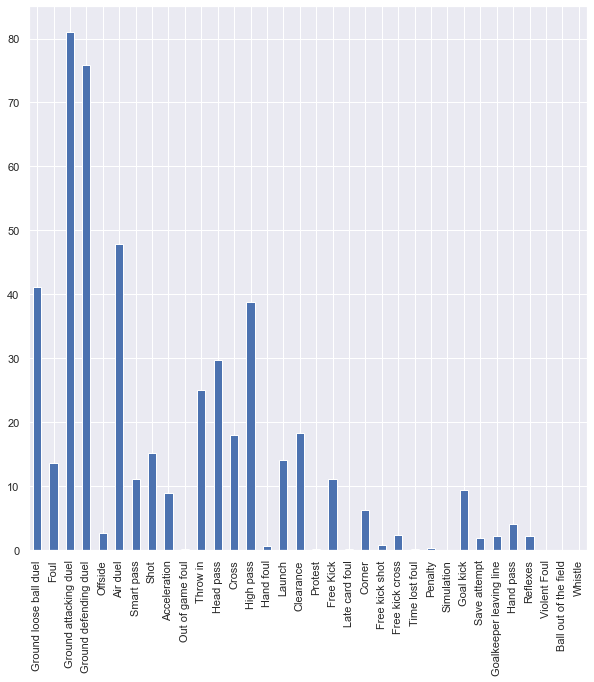

In [24]:
ax = win_counts.plot.bar(figsize=(10, 10))

### 2.2 Losses

In [26]:
loss = games.loc[games['win'] == 0]
loss_counts = loss.mean(axis=0)
loss_counts.to_frame()

,0
gameWeek,19.073615
win,0.000000
Simple pass,369.806851
Touch,53.266035
Ground loose ball duel,40.945335
Foul,14.213557
Ground attacking duel,77.852041
Ground defending duel,78.389942
Offside,2.426385
Air duel,47.871720


#### Remove string and categorical values (team, week, etc.)

In [27]:
loss_counts = loss_counts.iloc[4:]

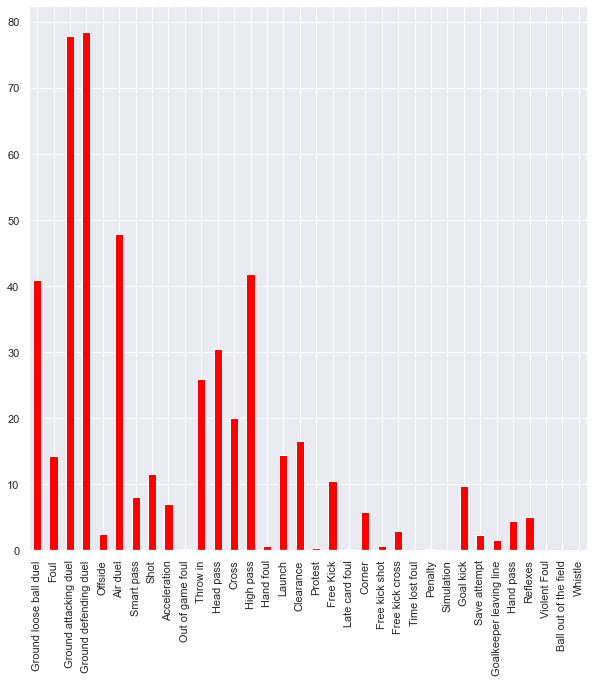

In [28]:
ax = loss_counts.plot.bar(figsize=(10, 10), color = 'red')

### 2.3 Draws

In [29]:
draws = games.loc[games['win'] == 1]
draws_counts = draws.mean(axis=0)
draws_counts.to_frame()

,0
gameWeek,19.440529
win,1.000000
Simple pass,385.009912
Touch,56.081498
Ground loose ball duel,44.283040
Foul,14.639868
Ground attacking duel,80.947137
Ground defending duel,78.279736
Offside,2.539648
Air duel,54.300661


#### Remove string and categorical values (team, week, etc.)

In [30]:
draws_counts = draws_counts.iloc[4:]

<AxesSubplot:>

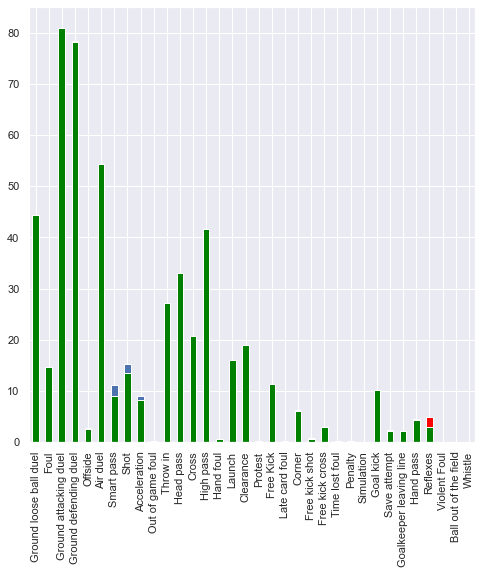

In [31]:
ax = win_counts.plot.bar(figsize=(8, 8))
loss_counts.plot.bar(ax=ax, color='red')
draws_counts.plot.bar(ax=ax, color='green')

<AxesSubplot:>

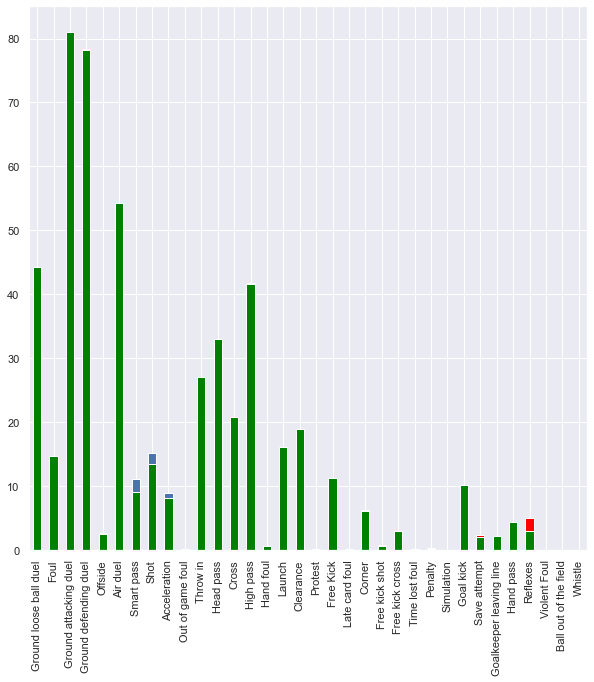

In [35]:
ax = win_counts.plot.bar(figsize=(10, 10))
loss_counts.plot.bar(ax=ax, color='red')
draws_counts.plot.bar(ax=ax, color='green')

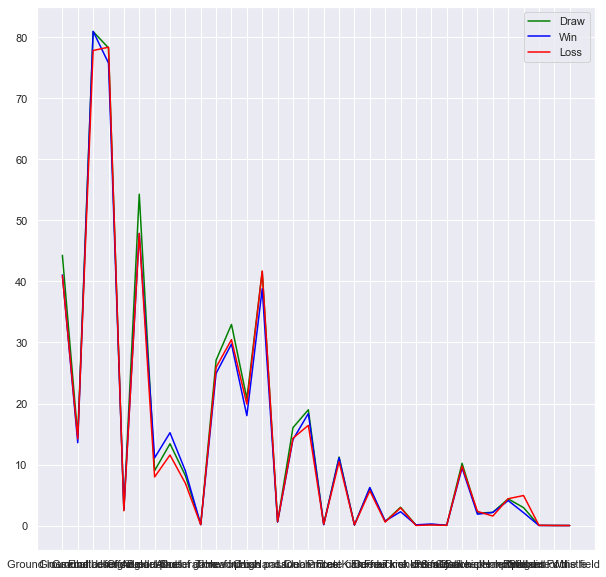

In [41]:
from matplotlib.legend_handler import HandlerLine2D

plt.figure(figsize=(10,10))
tie, = plt.plot(draws_counts, color='green', label='Draw')
win, = plt.plot(win_counts, color='blue', label='Win')
loss, = plt.plot(loss_counts, color='red', label='Loss')

plt.legend(handler_map={tie: HandlerLine2D()})